# Week 12 - Percolation

Domingo, Kenneth V.<br />
2015-03116

Primary references:
1. Kinzel, W., and G. Reents (1998). Percolation. In M. Clajus, and B. Freeland-Clajus (Trans.), <i>Physics by computer: Programming physical problems using Mathematica and C</i> (pp. 171-181). New York: Springer (Original work published 1996).

In [1]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.animation as anim
import numpy.random as rd

mp.rcParams["text.usetex"] = True
mp.rcParams["figure.figsize"] = (7,7)

In [2]:
class Percolation(object):

    #Create a lattice
    def lattice(self,L,p): 
        return (np.random.random([L,L])<p)*1
        
    #Count the number and size of percolating clusters
    def mass(self,label): 
        elements, counts = np.unique(label, return_counts = 1)      
        return np.mean(counts[elements!=0])
        
    #Hoshen-Kopelman algorithm
    def labelling(self, n, p): #Create the clusters and label them
        a = self.lattice(n,p)
        label = np.zeros_like(a, dtype = int)
    
        label[:,0] = a[:,0]*-1
        label[0,:] = a[0,:]*-1
        label[:,n-1] = a[:,n-1]*-1
        label[n-1,:] = a[n-1,:]*-1
        for i in range(1,n-1):
            for j in range(1,n-1):
                if a[i,j]: #if occupied
                    if a[i-1, j] and not(a[i,j-1]): #up
                        label[i,j] = label[i-1,j]
                    elif a[i, j-1] and not(a[i-1, j]):
                        label[i,j] = label[i, j-1]
                    elif not(a[i,j-1]) and not(a[i-1, j]):
                        label[i,j] = np.max(label) + 1
                    elif a[i-1, j] and a[i, j-1]:
                        if label[i-1,j] < label[i, j-1]:
                            label[i,j] = label[i-1,j]
                            label[label == label[i, j-1]] = label[i-1,j]
                        elif label[i-1,j] > label[i, j-1]:
                            label[i,j] = label[i,j-1]
                            label[label == label[i-1, j]] = label[i,j-1]
                        else:
                            label[i,j] = label[i, j-1] 
                    if i == n-2:
                        if label[i+1, j] == -1:
                            label[label == label[i,j]] = -1
                    if j == n-2:
                        if label[i, j+1] == -1:
                            label[label == label[i,j]] = -1
                            
        label[label==-1] = 0
        clustersize = self.mass(label)
        return a, label, clustersize
    
    #percolation threshold
    def thresh(self,n = 50,trials = 10):
        pl = np.arange(0, 1.1, 0.01)
        massl = np.empty_like(pl)
        for w in range(0, 100):
            p = pl[w]
            massp = []
            for _ in range(trials):
                print(' trial', len(massp))
                print(' p= ', p)
                __, __, clustersize = self.labelling(n,p)
                massp.append(clustersize)
            if len(massp) != 0:
                massl[w] = np.mean(massp)
            else:
                massl[w] = 0
        return pl, massl
    
    def labellingplot(self):
        a, label, _ = self.labelling(500,0.59275)
        mp.figure()
        mp.imshow(a, cmap = 'gray')
        mp.title(r"\textrm{Percolation at p = %s}"%(0.59275))
        mp.savefig('Percolation.png', dpi = 300, bbox_inches = 'tight')

        mp.figure()
        mp.imshow(label)
        mp.title(r"\textrm{Size clusters at p = %s}"%(0.59275))
        mp.savefig('Labelling.png', dpi = 300, bbox_inches = 'tight')


    def Percothreshplot(self):
        pl,massl = self.thresh(n = 500, trials = 10)
        pthreshold = pl[massl == np.max(massl)]
        print('p_c = ', pthreshold )
        mp.figure()        
        mp.plot(pl, massl,'--ro', lw = 2, ms = 6)
        mp.xlabel("$p$", fontsize = 12) #Concentration
        mp.ylabel("$M$", fontsize = 12) #Cluster Mass   
        mp.savefig('Mvsp.png', dpi = 300, bbox_inches = 'tight')

 trial 0
 p=  0.0
 trial 1
 p=  0.0
 trial 2
 p=  0.0
 trial 3
 p=  0.0
 trial

F:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
F:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 4
 p=  0.0
 trial 5
 p=  0.0
 trial 6
 p=  0.0
 trial 7
 p=  0.0
 trial 8
 p=  0.0
 trial 9
 p=  0.0
 trial 0
 p=  0.01
 trial 1
 p=  0.01
 trial 2
 p=  0.01
 trial 3
 p=  0.01
 trial 4
 p=  0.01
 trial 5
 p=  0.01
 trial 6
 p=  0.01
 trial 7
 p=  0.01
 trial 8
 p=  0.01
 trial 9
 p=  0.01
 trial 0
 p=  0.02
 trial 1
 p=  0.02
 trial 2
 p=  0.02
 trial 3
 p=  0.02
 trial 4
 p=  0.02
 trial 5
 p=  0.02
 trial 6
 p=  0.02
 trial 7
 p=  0.02
 trial 8
 p=  0.02
 trial 9
 p=  0.02
 trial 0
 p=  0.03
 trial 1
 p=  0.03
 trial 2
 p=  0.03
 trial 3
 p=  0.03
 trial 4
 p=  0.03
 trial 5
 p=  0.03
 trial 6
 p=  0.03
 trial 7
 p=  0.03
 trial 8
 p=  0.03
 trial 9
 p=  0.03
 trial 0
 p=  0.04
 trial 1
 p=  0.04
 trial 2
 p=  0.04
 trial 3
 p=  0.04
 trial 4
 p=  0.04
 trial 5
 p=  0.04
 trial 6
 p=  0.04
 trial 7
 p=  0.04
 trial 8
 p=  0.04
 trial 9
 p=  0.04
 trial 0
 p=  0.05
 trial 1
 p=  0.05
 trial 2
 p=  0.05
 trial 3
 p=  0.05
 trial 4
 p=  0.05
 trial 5
 p=  0.05
 trial 6
 p=  0.05
 tria

 trial 3
 p=  0.42
 trial 4
 p=  0.42
 trial 5
 p=  0.42
 trial 6
 p=  0.42
 trial 7
 p=  0.42
 trial 8
 p=  0.42
 trial 9
 p=  0.42
 trial 0
 p=  0.43
 trial 1
 p=  0.43
 trial 2
 p=  0.43
 trial 3
 p=  0.43
 trial 4
 p=  0.43
 trial 5
 p=  0.43
 trial 6
 p=  0.43
 trial 7
 p=  0.43
 trial 8
 p=  0.43
 trial 9
 p=  0.43
 trial 0
 p=  0.44
 trial 1
 p=  0.44
 trial 2
 p=  0.44
 trial 3
 p=  0.44
 trial 4
 p=  0.44
 trial 5
 p=  0.44
 trial 6
 p=  0.44
 trial 7
 p=  0.44
 trial 8
 p=  0.44
 trial 9
 p=  0.44
 trial 0
 p=  0.45
 trial 1
 p=  0.45
 trial 2
 p=  0.45
 trial 3
 p=  0.45
 trial 4
 p=  0.45
 trial 5
 p=  0.45
 trial 6
 p=  0.45
 trial 7
 p=  0.45
 trial 8
 p=  0.45
 trial 9
 p=  0.45
 trial 0
 p=  0.46
 trial 1
 p=  0.46
 trial 2
 p=  0.46
 trial 3
 p=  0.46
 trial 4
 p=  0.46
 trial 5
 p=  0.46
 trial 6
 p=  0.46
 trial 7
 p=  0.46
 trial 8
 p=  0.46
 trial 9
 p=  0.46
 trial 0
 p=  0.47000000000000003
 trial 1
 p=  0.47000000000000003
 trial 2
 p=  0.47000000000000003
 tria

 trial 4
 p=  0.8200000000000001
 trial 5
 p=  0.8200000000000001
 trial 6
 p=  0.8200000000000001
 trial 7
 p=  0.8200000000000001
 trial 8
 p=  0.8200000000000001
 trial 9
 p=  0.8200000000000001
 trial 0
 p=  0.8300000000000001
 trial 1
 p=  0.8300000000000001
 trial 2
 p=  0.8300000000000001
 trial 3
 p=  0.8300000000000001
 trial 4
 p=  0.8300000000000001
 trial 5
 p=  0.8300000000000001
 trial 6
 p=  0.8300000000000001
 trial 7
 p=  0.8300000000000001
 trial 8
 p=  0.8300000000000001
 trial 9
 p=  0.8300000000000001
 trial 0
 p=  0.84
 trial 1
 p=  0.84
 trial 2
 p=  0.84
 trial 3
 p=  0.84
 trial 4
 p=  0.84
 trial 5
 p=  0.84
 trial 6
 p=  0.84
 trial 7
 p=  0.84
 trial 8
 p=  0.84
 trial 9
 p=  0.84
 trial 0
 p=  0.85
 trial 1
 p=  0.85
 trial 2
 p=  0.85
 trial 3
 p=  0.85
 trial 4
 p=  0.85
 trial 5
 p=  0.85
 trial 6
 p=  0.85
 trial 7
 p=  0.85
 trial 8
 p=  0.85
 trial 9
 p=  0.85
 trial 0
 p=  0.86
 trial 1
 p=  0.86
 trial 2
 p=  0.86
 trial 3
 p=  0.86
 trial 4
 p=  0.

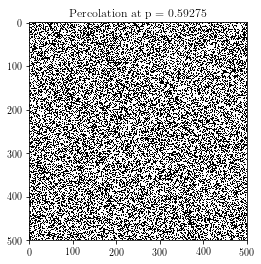

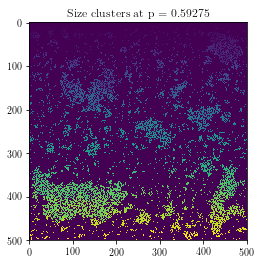

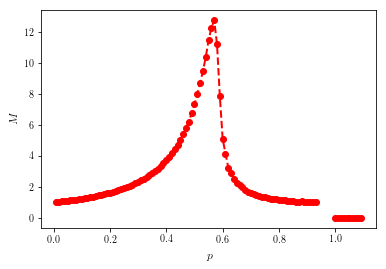

In [3]:
sim = Percolation()
sim.labellingplot()
sim.Percothreshplot()

In [8]:
class perco2:
    
    def __init__(self, L):
        rd.seed(314)
        self.L = L
        self.lattice = np.zeros((L,L), int)
        self.pr = rd.random()
        self.p = 0.59275
        for i in range(L):
            for j in range(L):
                if rd.random() < self.p:
                    self.lattice[i,j] = 1
                    
    def show_percolation(self, save=False):
        mp.figure()
        mp.title(r"\textrm{(5.6) Percolation structure at $p_c$}")
        mp.imshow(self.lattice, cmap="gray")
        if save:
            mp.savefig("percolation.png", dpi=300, bbox_inches="tight")
        mp.show()
        
    def labelling(self):
        #define NOTDEFINED 0
        #define OCCUPIED 1
        #define VACANT 2
        L = self.L
        arr = np.zeros((L,L), int)
        arr[0,:] = 2
        arr[:,0] = 2
        arr[:,L-1] = 2
        arr[L-1,:] = 2
        arr[L//2, L//2] = 1
        self.arr = arr
        pd = 4*L
        li = np.zeros((pd,2), int)
        li[0] = [L//2+1, L//2]
        li[1] = [L//2, L//2+1]
        li[2] = [L//2-1, L//2]
        li[3] = [L//2, L//2-1]
        self.count = 3
        
        def definition(i,j):
            count = self.count
            if arr[i,j] != 0:
                return
            if rd.random() < self.p:
                arr[i,j] = 1
                if arr[i,j+1] == 0:
                    count += 1
                    li[count%pd,0], li[count%pd,1] = i, j+1
                if arr[i,j-1] == 0:
                    count += 1
                    li[count%pd,0], li[count%pd,1] = i, j-1
                if arr[i+1,j] == 0:
                    count += 1
                    li[count%pd,0], li[count%pd,1] = i+1, j
                if arr[i-1,j] == 0:
                    count += 1
                    li[count%pd,0], li[count%pd,1] = i-1, j
                else:
                    arr[i,j] = 2
                
                self.count = count
                self.arr = arr
                self.li = li
        
        while True:
            for
                    
    def show_cluster(self, save=False):
        mp.figure()
        mp.title(r"\textrm{(5.7) Percolating cluster at $p_c$}")
        mp.imshow(self.arr, cmap="gray")
        if save:
            mp.savefig("labelling.png", dpi=300, bbox_inches="tight")
        mp.show()

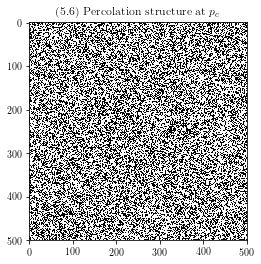

Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _start
    self._init_draw()
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1758, in _init_draw
    for a in self._drawn_artists:
TypeError: 'AxesImage' object is not iterable
Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _star

Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _start
    self._init_draw()
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1758, in _init_draw
    for a in self._drawn_artists:
TypeError: 'AxesImage' object is not iterable
Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _star

Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _start
    self._init_draw()
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1758, in _init_draw
    for a in self._drawn_artists:
TypeError: 'AxesImage' object is not iterable
Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _star

Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _start
    self._init_draw()
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1758, in _init_draw
    for a in self._drawn_artists:
TypeError: 'AxesImage' object is not iterable
Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _star

KeyboardInterrupt: 

Traceback (most recent call last):
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1026, in _start
    self._init_draw()
  File "F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1758, in _init_draw
    for a in self._drawn_artists:
TypeError: 'AxesImage' object is not iterable


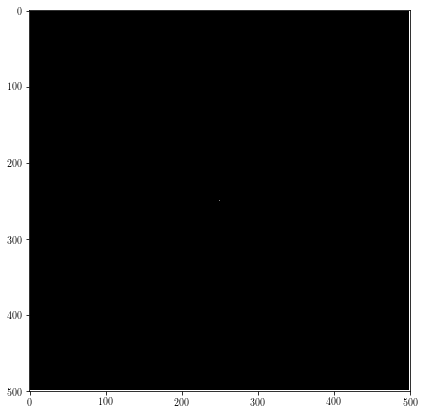

In [9]:
sim = perco2(500)
sim.show_percolation()
sim.labelling()
sim.show_cluster()

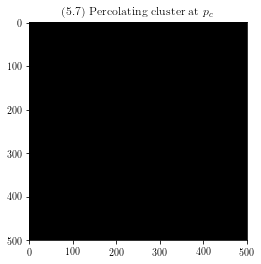

In [10]:
sim.show_cluster()